# Turbulence-driven Deflagration-to-Detonation transition (tDDT) and its role in type Ia detonations

This notebook contain notes from Poludnenko+ 2019 "A unified mechanism for unconfined deflagration-to-detonation transition in terrestrial chemical systems and type Ia supernovae" [[Link here]](https://science.sciencemag.org/content/366/6465/eaau7365/tab-pdf) and relevant papers from the literature.

Codes here are either written originally or adapted from Chris Byrohl's previous codes.

## Table of Contents
1. [Theoretical background: tDDT and thermonuclear explosions](#theory)
2. [Function Definitions](#functions)
3. Results
    * [March 5, 2021 meeting](#march5)
        * Single bubble
            1. [Global quantities](#glob1)
            2. [tDDT criteria monitor](#tddt1)
            3. [Slice plots](#slice1) 
4. Meeting Notes
    * [March 5, 2021 meeting](#march5notes)

## Theoretical background: tDDT and thermonuclear explosions <a class="anchor" id="theory"></a>


Numerical simulations of turbulent flames with speed $S_T$ greater than the Chapman-Jouguet (CJ) speed proceed to a detonation. The Chapman-Jouguet flame speed is a condition at which the product flow becomes *sonic* in the comoving frame with respect to the flame.

The turbulence-driven DDT condition is given by,
\begin{equation}
    \boxed{S_\textrm{T} > S_\textrm{CJ} = \frac{c_s}{\alpha}}
\end{equation}
where
\begin{equation}
    \alpha =\frac{\rho_\textrm{fuel}}{\rho_\textrm{ash}}
\end{equation}
that is, when $S_\textrm{T}$ exceeds $S_\textrm{CJ}$ we expect to immediately see a detonation ($S_T/S_\textrm{CJ}\geq 1$). (What physical features do we expect from such a detonation? (1) Rapid pressure build-up, and (2) strong shocks.) This is equivalent to the relation
\begin{equation*}
    \dot{e}\gtrsim \dfrac{e}{t_s}
\end{equation*}
which means that when the turbulent flame speed $S_T$ exceeds the Chapman-Jouguet speed, the thermonuclear burning releases energy $e$ less than or equal to the amount contained in the flame volume, within sound-crossing time $t_s$,
\begin{equation*}
    t_s = \dfrac{\delta_T}{c_s}
\end{equation*}
where $\delta_T$ is the turbulent flame width.

**Note:** tDDT only depends on this criterion and not on the structure of turbulent flame or the combustion regime.

The turbulent flame speed in the corrugated and wrinkled flamelet regimes ($\lambda\ll\delta_L$) is given by,
\begin{equation}
    \dfrac{S_T}{S_L} = I_M\dfrac{A_T}{L^2}
\end{equation}
where $S_L$ is the *unperturbed* laminar flame speed, $I_M$ is a coefficient that takes turbulent stretch into account, $A_T$ is the surface area of the turbulent flame folded into some volume of size $L$ (*the turbulent flame speed grows proportionally with its surface area*). The turbulent intensity $U_\lambda$ can be approximated by,
\begin{equation*}
    U_\lambda = \alpha I_M S_L 
\end{equation*}
The flame surface (volume) density is then given as the inverse of the average flame sheet separation because of the turbulence-induced packing, such that
\begin{equation*}
    \dfrac{1}{I_M L}\left(\dfrac{S_T}{S_L}\right) = \dfrac{A_T}{L^3}=\dfrac{1}{\lambda_f}
\end{equation*}
The speed criterion could then be massaged in order to obtain the critical length scale $L_\textrm{CJ}$, otherwise known as the Chapman-Jouguet length,
\begin{align*}
    \dfrac{S_{CJ}}{S_L}=\dfrac{c_s}{\alpha S_L} &= I_ML_{CJ}\dfrac{A_T}{L_{CJ}^3}\\
    &= \dfrac{I_ML_{CJ}}{\lambda_f}\\
    \to~L_{CJ}&=\left(\dfrac{1}{\alpha  I_M}\dfrac{c_s}{S_L}\right)\lambda_f
\end{align*}
The smallest scale in which tDDT can occur corresponds to maximally tight flame packing where the average flame sheet separation $\lambda_f$ is approximately equal to the laminar flame thickness $\delta_L$, such that 
\begin{equation*}
    L_{CJ}=\left(\dfrac{1}{\alpha  I_M}\dfrac{c_s}{S_L}\right)\delta_L
\end{equation*}

The integral turbulent velocity,
\begin{equation*}
\boxed{U_l^\textrm{max}=\alpha I_M S_L\left(\dfrac{l}{\delta_L}\right)^{1/3}}
\end{equation*}
would provide maximum burn rate per unit volume since it creates the most tightly packed flame $\to$ perfect condition for tDDT onset in the smallest possible volume ($U_T/U_l^\textrm{max}=1$)!

The turbulent intensity $U_\textrm{CJ}$ at the scale $L_\textrm{CJ}$ would provide flame packing to achieve $S_T/S_\textrm{CJ}=1$ is given by,
\begin{equation*}
\dfrac{U_\textrm{CJ}}{U_\lambda}=\left(\dfrac{L_\textrm{CJ}}{\lambda_f}\right)^{1/3}=\left(\dfrac{c_s}{\alpha I_M S_L}\right)^{1/3}
\end{equation*}
which is scale free! Hence, we can write the turbulent speed in an integral scale $l$, $U_l$, as
\begin{align*}
U_l &= (\alpha I_M S_L)^{2/3} c_s^{1/3} \left(\dfrac{l}{L_\textrm{CJ}}\right)^{1/3}\\
U_l^3 &=(\alpha I_M S_L)^2 c_s \left(\dfrac{l}{L_\textrm{CJ}}\right)
\end{align*}
such that 
\begin{equation*}
\boxed{L_\textrm{CJ}=(\alpha I_M S_L)^2 c_s \dfrac{l}{U_l^3}}.
\end{equation*}

However at the Chapman-Jouguet lengthscale, the critical CJ flame speed is typically higher than the CJ turbulent velocity $S_\textrm{CJ}>U_\textrm{CJ}$.

Summary of criteria that could be used for determining Chapman-Jouguet conditions:
1. $S_T/S_\textrm{CJ}\geq 1$
2. $U_l/U_l^\textrm{max}\geq 1$
3. $L/L_\textrm{CJ}\geq 1$



## Function definitions <a class="anchor" id="functions"></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import pandas as pd
import os
import yt

%run -i python/helper_tabulateddata.py
fn = "data/flameprops/flame_properties.rho.7e6-5e9.XC0.5.dat"
fprops = flameprops(fn)

#Function that computes for sound speed
def _CS(field, data):
    pressure = data[('flash','pres')]
    density = data[('flash','dens')]
    gamma = data[('flash','gamc')]
    
    return (gamma*pressure/density)**(1./2)

#Function that computes for the Chapman-Jouguet length
def _LCJ(field, data):
    dens = data[('flash','dens')] #density
    spd_sound = data[('flash','sndspd')] #speed of sound
    S_L = fprops.get_value(dens,'laminar flame speed')*yt.units.cm/yt.units.s #laminar flame speed
    alpha = fprops.get_value(dens,'12C fluid expansion factor') #fuel-to-ash burn ratio
    l = data["dx"]
    U_l = data[('flash','turb')]*yt.units.cm/yt.units.s #turbulence intensity
    I_M = 1.0 #coefficient of turbulent stretch, for thermonuclear burning =1
    
    return (alpha*I_M*S_L)**2*spd_sound*(l/U_l**3)

#Function that computes for the ratio between the integral scale and the Chapman-Jouguet Length

def _Lratio1(field,data):
    return data["dx"]/data[('flash','LCJ')]

#Function that computes for the ratio between the Chapman-Jouguet Length and the laminar flame thickness

def _Lratio2(field,data):
    dens = data[('flash','dens')]
    delta_L = fprops.get_value(dens,'width of the 12C-burning zone')*yt.units.cm # laminar flame thickness
    L_CJ = data[('flash','LCJ')]
    
    return (L_CJ/delta_L)

#Function that computes for the ratio between turbulent velocity and the turbulent velocity 
#that provides maximum burning rate which could lead to tDDT

def _Uratio(field,data):
    dens = data[('flash','dens')] #density
    spd_sound = data[('flash','sndspd')] #speed of sound
    S_L = fprops.get_value(dens,'laminar flame speed')*yt.units.cm/yt.units.s #laminar flame speed
    delta_L = fprops.get_value(dens,'width of the 12C-burning zone')*yt.units.cm # laminar flame thickness
    alpha = fprops.get_value(dens,'12C fluid expansion factor') #fuel-to-ash burn ratio
    l = 4*data["dx"]
    U_l = data[('flash','turb')]*yt.units.cm/yt.units.s #turbulence intensity
    I_M = 1.0 #coefficient of turbulent stretch, for thermonuclear burning =1
    
    return U_l/(alpha*I_M*S_L*(l/delta_L)**(1.0/3.0))

#Function that computes for the ratio between the flame speed and the Chapman-Jouguet flame speed

def _Sratio(field,data):
    dens = data[('flash','dens')] #density
    alpha = fprops.get_value(dens,'12C fluid expansion factor') #fuel-to-ash burn ratio
    
    return (data[('flash','fspd')]*yt.units.cm/yt.units.s)/(data['flash','sndspd']/alpha)

# Add derived yt fields
yt.add_field(('flash','Sratio'), function=_Sratio,
              display_name=r"$S_T/S_\mathrm{CJ}$", sampling_type="cell",force_override=True)
yt.add_field(('flash','Uratio'), function=_Uratio,
              display_name=r"$U_l/U_l^\mathrm{max}$", sampling_type="cell",force_override=True)
yt.add_field(('flash','Lratio1'), function=_Lratio1,
              display_name=r"$L/L_\mathrm{CJ}$", sampling_type="cell",force_override=True)
yt.add_field(('flash','Lratio2'), function=_Lratio2,
              display_name=r"$L_\mathrm{CJ}/\delta_L$", sampling_type="cell",force_override=True)
yt.add_field(('flash','sndspd'),function = _CS, units="cm/s", 
             display_name = "sound speed", force_override=True)
yt.add_field(('flash','LCJ'), function=_LCJ, units="cm", 
             display_name=r"$L_\mathrm{CJ}$", sampling_type="cell",force_override=True)

#Function that produces a plot panel of global observables through time
def MakeGlobal(file):
    data_head = np.array(pd.read_csv(file,  delim_whitespace=True).columns)
    data = np.genfromtxt(file)
    data_new = np.ndarray.transpose(np.zeros(shape = np.shape(data)))
    
    for i in range(np.shape(data_new)[0]):
        for j in range(np.shape(data_new)[1]):
            data_new[i,j] = data[j,i]
            
    no = int(np.shape(data_new)[0]/3)+1
    fig, axes = plt.subplots(int(np.shape(data_new)[0]/3), 3, figsize=(15,3*no), tight_layout=True)
    axes = axes.flatten()
    
    for j in range(np.shape(data_new)[0]-1):
        axes[j].plot(data_new[0],data_new[j+1])
        axes[j].set_title(data_head[j+1])
    
    plt.savefig(os.path.splitext(file)[0]+".jpg")
    
# Function that makes multipanel plot
def MakePanel(data):
    fig = plt.figure()
    grid = AxesGrid(fig, (0.1,0.1,0.85,0.85),
                nrows_ncols = (2, 2),
                axes_pad = 1.0,
                label_mode = "1",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="5%",
                cbar_pad="0%")
    fields = [('flash','Sratio'),('flash','Lratio1'),('flash','Lratio2'),('flash','Uratio')]
    plot = yt.SlicePlot(data, 'x', fields,width = (3000,"km"))
    
    for i, field in enumerate(fields):
        p = plot.plots[field]
        p.figure = fig
        p.axes = grid[i].axes
        p.cax = grid.cbar_axes[i]
    
    plot._setup_plots()
    plt.savefig('multi_panel.png')

# Function that displays basic volume render of yt fields
def MakeVolume(data,field):
    im, sc = yt.volume_render(data, field, fname = 'render1.png')
    sc.camera.width = (500, 'km')
    sc.camera.switch_orientation()
    sc.save('render2.png')
    sc.show()


# Results (FLASH 4 Post-processing)

## March 5, 2021 Meeting (9 AM, EST - Bob, Alexei, Vadim, and Mark) <a class="anchor" id="march5"></a>

### Central-offset Single Bubble Ignition

### Global Parameters <a class="anchor" id="glob1"></a>

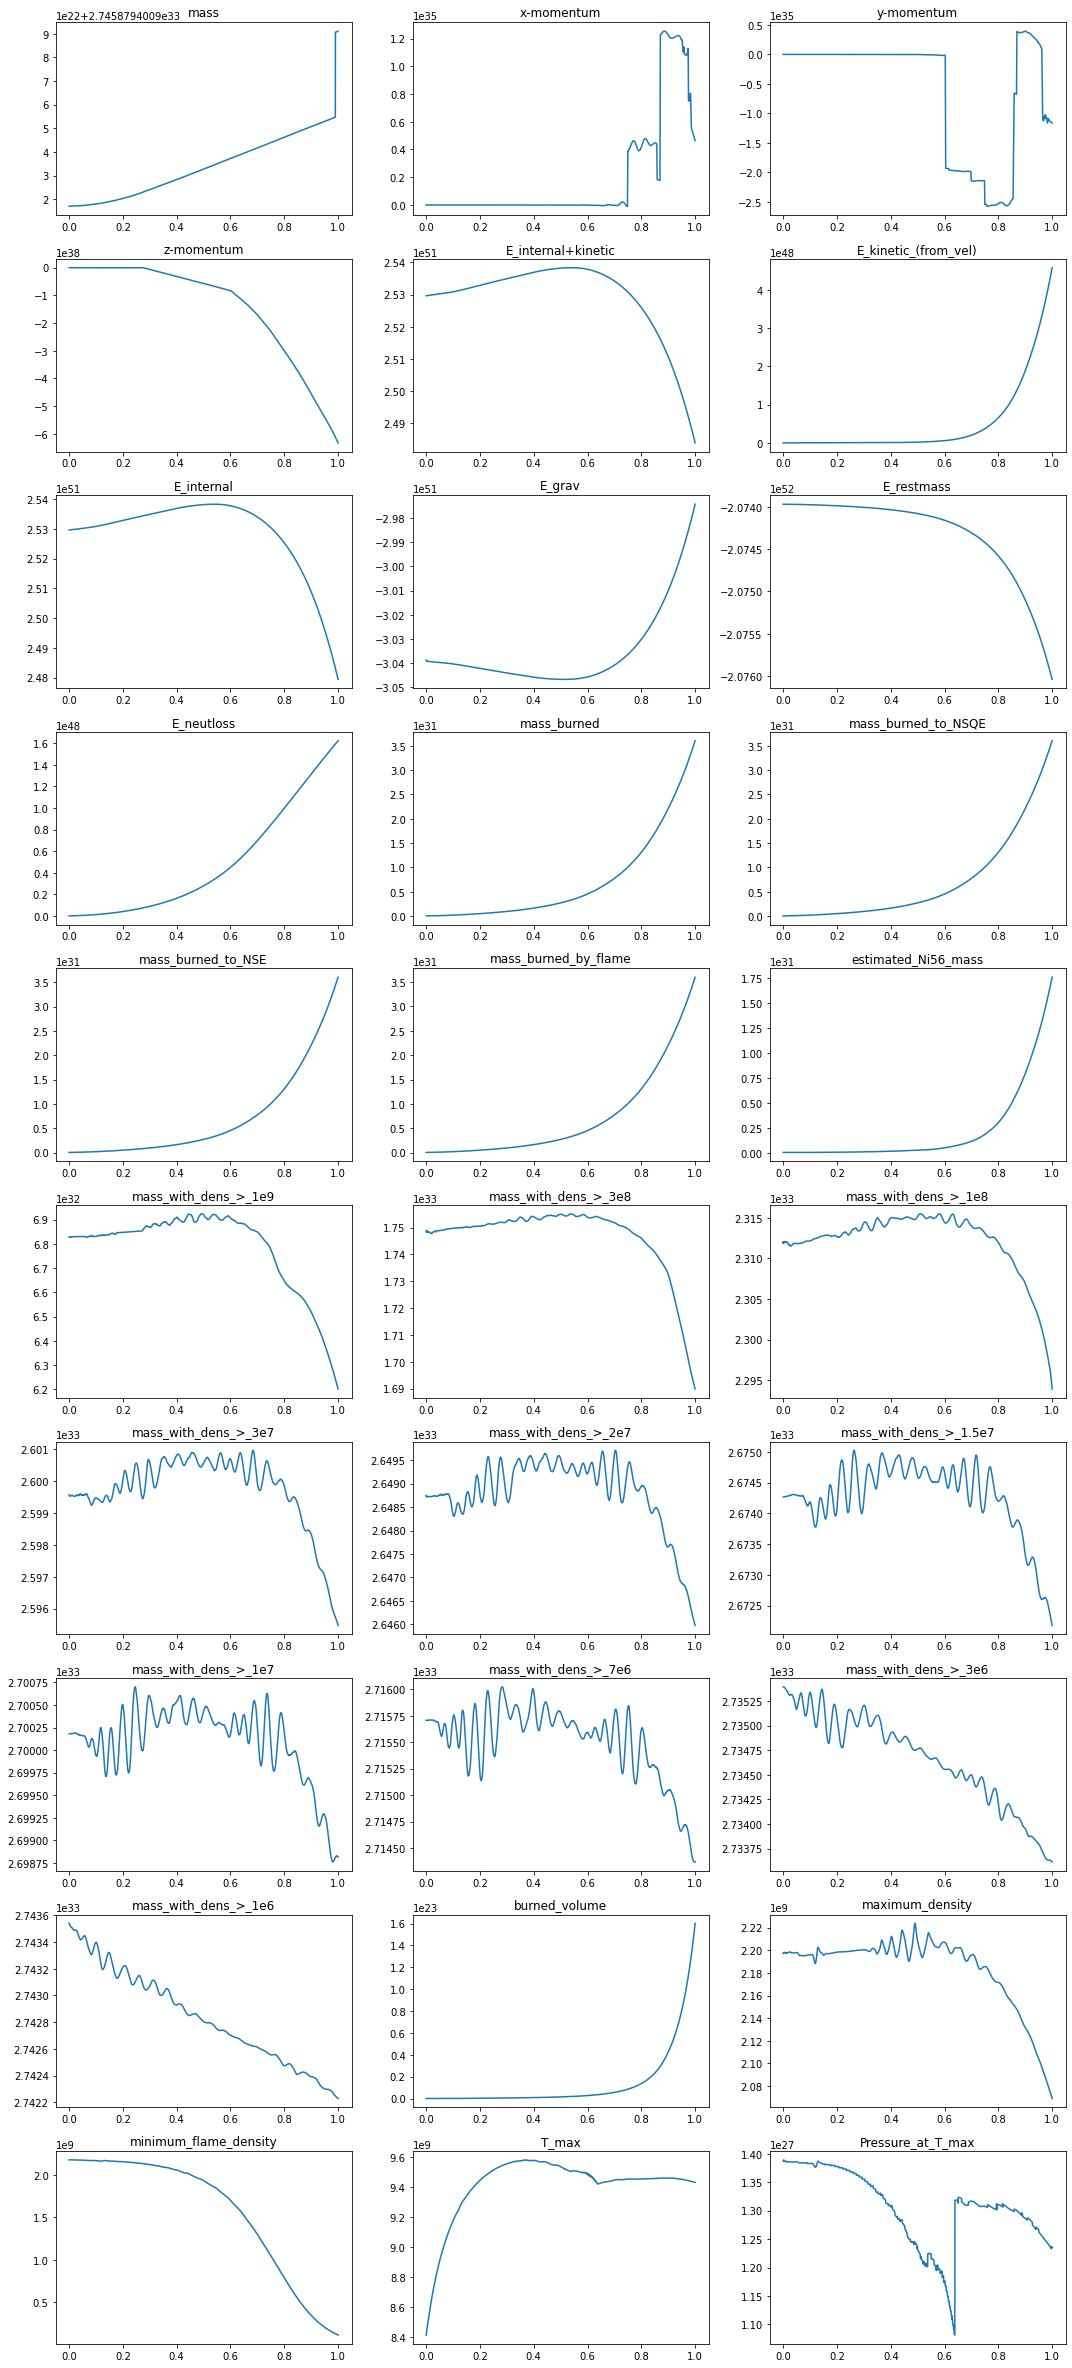

In [40]:
MakeGlobal("2_turbddtsingle.dat")

### tDDT criterion plot <a class="anchor" id="tddt1"></a>

*Python script currently running on Stampede2*

### Slice Plots <a class="anchor" id="slice1"></a>

### At time t = 60 [s]

In [41]:
ds1 = yt.load("2_turbddtsingle_hdf5_plt_cnt_000060")

yt : [INFO     ] 2021-03-05 07:14:47,002 Parameters: current_time              = 0.6000439815407145
yt : [INFO     ] 2021-03-05 07:14:47,035 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-03-05 07:14:47,094 Parameters: domain_left_edge          = [-6.5536e+09 -6.5536e+09 -6.5536e+09]
yt : [INFO     ] 2021-03-05 07:14:47,097 Parameters: domain_right_edge         = [6.5536e+09 6.5536e+09 6.5536e+09]
yt : [INFO     ] 2021-03-05 07:14:47,099 Parameters: cosmological_simulation   = 0.0


/home/mark-1/.local/lib/python3.8/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: divide by zero encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-03-05 07:17:43,436 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:17:43,438 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:17:43,441 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:17:43,443 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:17:43,446 Making a fixed resolution buffer of (('flash', 'Sratio')) 800 by 800
yt : [INFO     ] 2021-03-05 07:17:43,881 Making a fixed resolution buffer of (('flash', 'Lratio1')) 800 by 800
yt : [INFO     ] 2021-03-05 07:17:43,977 Making a fixed resolution buffer of (('flash', 'Lratio2')) 800 by 800
yt : [INFO     ] 2021-03-05 07:17:44,055 Making a fixed resolution buffer of (('flash', 'Uratio')) 800 by 800


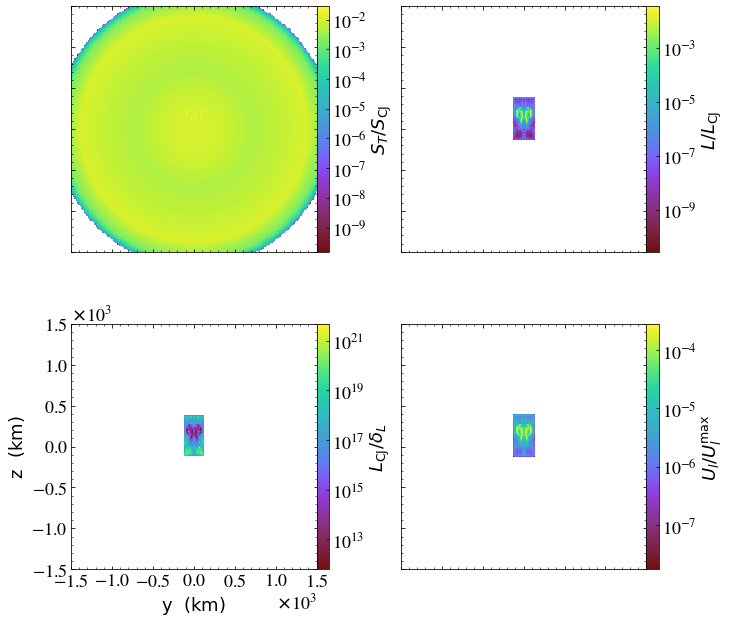

In [42]:
MakePanel(ds1)

### At time t = 70 [s]

In [62]:
ds2 = yt.load("2_turbddtsingle_hdf5_plt_cnt_000070")

yt : [INFO     ] 2021-03-05 07:47:29,026 Parameters: current_time              = 0.7004689465433406
yt : [INFO     ] 2021-03-05 07:47:29,027 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-03-05 07:47:29,028 Parameters: domain_left_edge          = [-6.5536e+09 -6.5536e+09 -6.5536e+09]
yt : [INFO     ] 2021-03-05 07:47:29,029 Parameters: domain_right_edge         = [6.5536e+09 6.5536e+09 6.5536e+09]
yt : [INFO     ] 2021-03-05 07:47:29,030 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-03-05 07:47:35,087 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:47:35,087 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:47:35,088 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:47:35,088 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:47:35,090 Making a fixed resolution buffer of (('flash', 'Sratio')) 800 by 800
yt : [INFO     ] 2021-03-05 07:47:35,243 Making a fixed resolution buffer of (('flash', 'Lratio1')) 800 by 800
yt : [INFO     ] 2021-03-05 07:47:35,253 Making a fixed resolution buffer of (('flash', 'Lratio2')) 800 by 800
yt : [INFO     ] 2021-03-05 07:47:35,266 Making a fixed resolution buffer of (('flash', 'Uratio')) 800 by 800


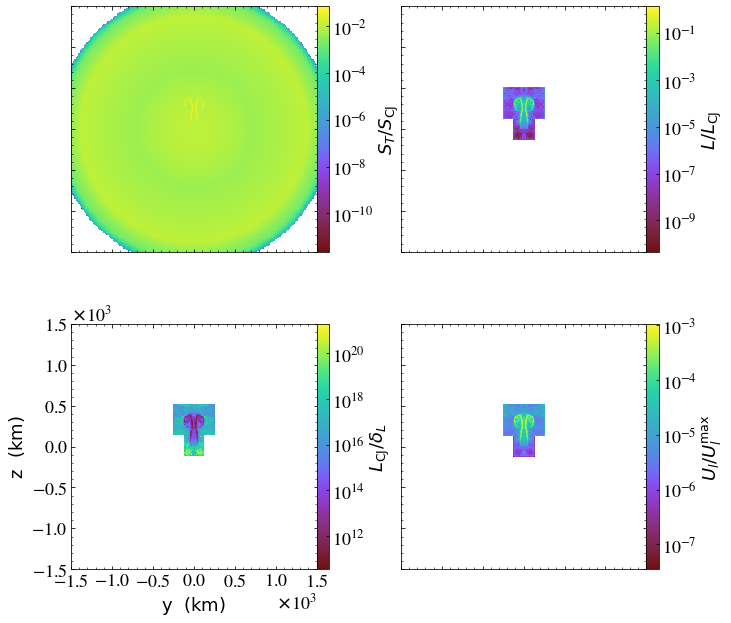

In [63]:
MakePanel(ds2)

### At time t = 80 [s]

In [65]:
ds3 = yt.load("2_turbddtsingle_hdf5_plt_cnt_000080")

yt : [INFO     ] 2021-03-05 07:55:27,409 Parameters: current_time              = 0.8003037114341905
yt : [INFO     ] 2021-03-05 07:55:27,409 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-03-05 07:55:27,412 Parameters: domain_left_edge          = [-6.5536e+09 -6.5536e+09 -6.5536e+09]
yt : [INFO     ] 2021-03-05 07:55:27,413 Parameters: domain_right_edge         = [6.5536e+09 6.5536e+09 6.5536e+09]
yt : [INFO     ] 2021-03-05 07:55:27,413 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-03-05 07:56:02,470 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:56:02,470 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:56:02,471 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:56:02,471 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:56:02,472 Making a fixed resolution buffer of (('flash', 'Sratio')) 800 by 800
yt : [INFO     ] 2021-03-05 07:56:02,739 Making a fixed resolution buffer of (('flash', 'Lratio1')) 800 by 800
yt : [INFO     ] 2021-03-05 07:56:02,752 Making a fixed resolution buffer of (('flash', 'Lratio2')) 800 by 800
yt : [INFO     ] 2021-03-05 07:56:02,800 Making a fixed resolution buffer of (('flash', 'Uratio')) 800 by 800


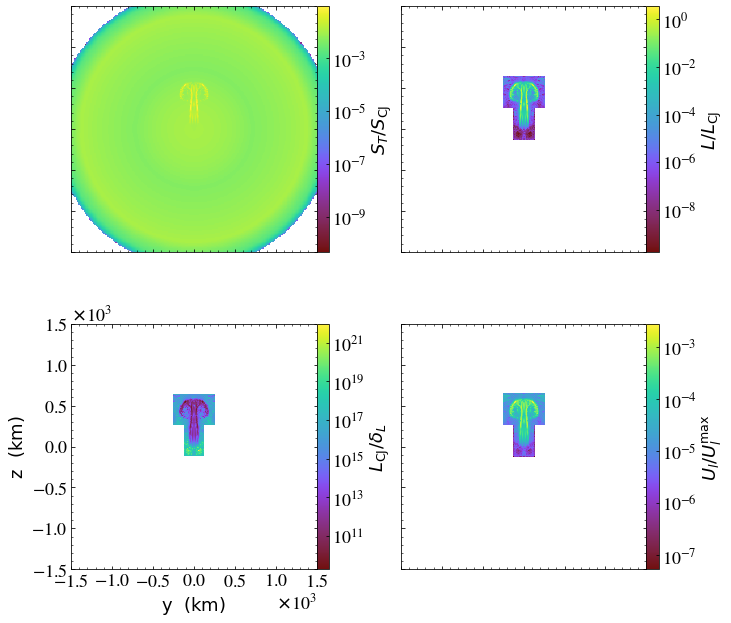

In [66]:
MakePanel(ds3)

### At time t = 90 [s]

In [67]:
ds4 = yt.load("2_turbddtsingle_hdf5_plt_cnt_000090")

yt : [INFO     ] 2021-03-05 08:00:42,230 Parameters: current_time              = 0.9001669511567172
yt : [INFO     ] 2021-03-05 08:00:42,231 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-03-05 08:00:42,231 Parameters: domain_left_edge          = [-6.5536e+09 -6.5536e+09 -6.5536e+09]
yt : [INFO     ] 2021-03-05 08:00:42,232 Parameters: domain_right_edge         = [6.5536e+09 6.5536e+09 6.5536e+09]
yt : [INFO     ] 2021-03-05 08:00:42,233 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-03-05 08:00:52,614 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 08:00:52,615 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 08:00:52,616 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 08:00:52,616 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 08:00:52,617 Making a fixed resolution buffer of (('flash', 'Sratio')) 800 by 800
yt : [INFO     ] 2021-03-05 08:00:52,815 Making a fixed resolution buffer of (('flash', 'Lratio1')) 800 by 800
yt : [INFO     ] 2021-03-05 08:00:52,826 Making a fixed resolution buffer of (('flash', 'Lratio2')) 800 by 800
yt : [INFO     ] 2021-03-05 08:00:52,841 Making a fixed resolution buffer of (('flash', 'Uratio')) 800 by 800


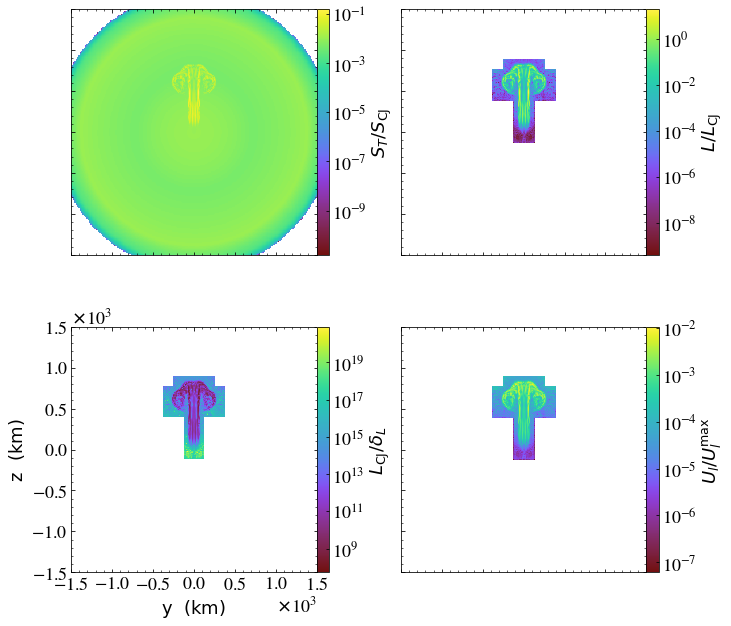

In [68]:
MakePanel(ds4)

### At time t = 100 [s]

In [57]:
ds5 = yt.load("2_turbddtsingle_hdf5_plt_cnt_000100")

yt : [INFO     ] 2021-03-05 07:43:53,213 Parameters: current_time              = 1.0001620992003568
yt : [INFO     ] 2021-03-05 07:43:53,214 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-03-05 07:43:53,215 Parameters: domain_left_edge          = [-6.5536e+09 -6.5536e+09 -6.5536e+09]
yt : [INFO     ] 2021-03-05 07:43:53,215 Parameters: domain_right_edge         = [6.5536e+09 6.5536e+09 6.5536e+09]
yt : [INFO     ] 2021-03-05 07:43:53,216 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-03-05 07:44:05,990 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:44:05,991 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:44:05,992 xlim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:44:05,993 ylim = -1500.000000 1500.000000
yt : [INFO     ] 2021-03-05 07:44:05,994 Making a fixed resolution buffer of (('flash', 'Sratio')) 800 by 800
yt : [INFO     ] 2021-03-05 07:44:06,182 Making a fixed resolution buffer of (('flash', 'Lratio1')) 800 by 800
yt : [INFO     ] 2021-03-05 07:44:06,192 Making a fixed resolution buffer of (('flash', 'Lratio2')) 800 by 800
yt : [INFO     ] 2021-03-05 07:44:06,206 Making a fixed resolution buffer of (('flash', 'Uratio')) 800 by 800


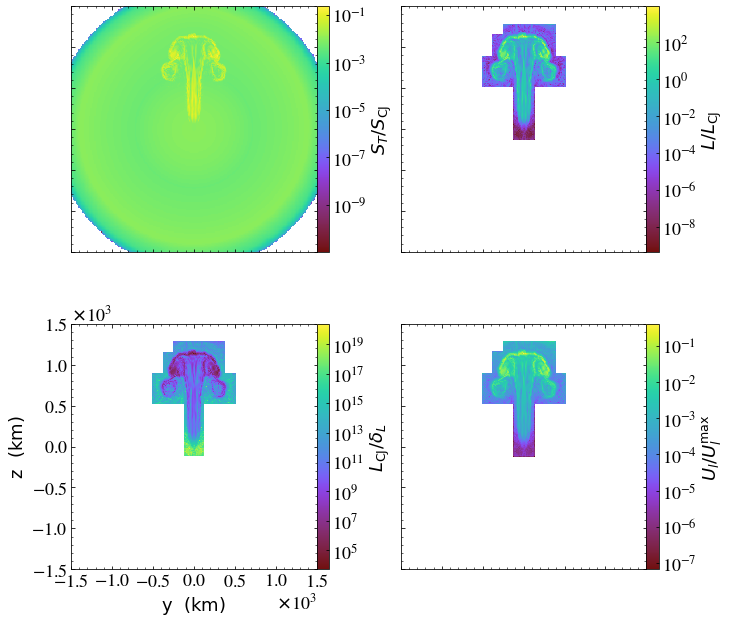

In [58]:
MakePanel(ds5)

*To update: Multi-ignition runs after Stampede2 run*

# Meeting Notes

### March 5, 2021 meeting <a class="anchor" id="march5notes"></a>

*To update after the meeting*